In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### sec01 : 판다스를 이용한 전체 데이터 추출 및 기본 함수
    - 01. csv 로드
    - 02. 행,열 head, tail
    - 03. 데이터프레임의 인덱스 확인, 변경
    - 04. 기본함수, 통계함수

In [2]:
import numpy as np
import pandas as pd

In [3]:
#1) csv파일을 df로 읽어오자 
df = pd.read_csv('C:\ds_work\data\movies_train.csv')
#2) 첫 끝 5줄 확인
df.head()
df.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [4]:
#3) 프레임의 사이즈 확인
df.shape
#4) 기본 정보
df.info()
# 클래스 유형, 인덱스 구성, 열이름 종류 개수 , 행이름 종류 개수, 메모리 할당


(600, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
#5)기술통계 확인 평균 표준편차 최소 최대 중간값
# df.describe()


In [6]:
#6) 데이터프레임 특정 열에 대한 통계함수를 적용하자 df["열이름"].count / mean / min / max, 
# box_off_num의 개수 , 최대 최소 표준편타를 출력
df['box_off_num'].count()
df['box_off_num'].max()
df['box_off_num'].min()
df['box_off_num'].std()


600

14262766

1

1828005.8511437648

In [7]:
#7) 특정 열의 고유값 개수를 확인
# genre 열
df['genre'].value_counts()


드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

### sec03 : 판다스를 이용한 조건 데이터 추출 및 기본 함수
    - 01. 데이터프레임에서 열, 행, 용소 추출
    - 02. boolean 인덱싱을 통해 데이터 추출

In [8]:
#1) title 컬럼을 이용한 데이터를 리턴 받고 타입을 확인 
print(df['title'])
print(type(df['title']))

0         개들의 전쟁
1           내부자들
2      은밀하게 위대하게
3       나는 공무원이다
4           불량남녀
         ...    
595           해무
596         파파로티
597        살인의 강
598       악의 연대기
599          베를린
Name: title, Length: 600, dtype: object
<class 'pandas.core.series.Series'>


In [9]:
#2 ) 여러 개의 컬럼을 통해 데이터 추출[[a,b,c]] 시리즈가 아니라 데이터프레임이라 [[]]2개필요
# title , director , box_off_num의 데이터 추출
df[['title','director','box_off_num']]

,title,director,box_off_num
0,개들의 전쟁,조병옥,23398
1,내부자들,우민호,7072501
2,은밀하게 위대하게,장철수,6959083
3,나는 공무원이다,구자홍,217866
4,불량남녀,신근호,483387
...,...,...,...
595,해무,심성보,1475091
596,파파로티,윤종찬,1716438
597,살인의 강,김대현,2475
598,악의 연대기,백운학,2192525


In [10]:
#3) 행 추출 : 객체.loc[행 인덱스 이름]
#             객체 .iloc[정수형 위치 인덱스]
df.loc[0]
df.iloc[0]

title                 개들의 전쟁
distributor         롯데엔터테인먼트
genre                     액션
release_time      2012-11-22
time                      96
screening_rat       청소년 관람불가
director                 조병옥
dir_prev_bfnum           NaN
dir_prev_num               0
num_staff                 91
num_actor                  2
box_off_num            23398
Name: 0, dtype: object

title                 개들의 전쟁
distributor         롯데엔터테인먼트
genre                     액션
release_time      2012-11-22
time                      96
screening_rat       청소년 관람불가
director                 조병옥
dir_prev_bfnum           NaN
dir_prev_num               0
num_staff                 91
num_actor                  2
box_off_num            23398
Name: 0, dtype: object

In [11]:
#4) 행 인덱스 지정 : 객체.set_index(열이름)
df02=df.set_index('title')
# df02 # 인덱스가 된다
df02.loc['내부자들']

distributor           (주)쇼박스
genre                    느와르
release_time      2015-11-19
time                     130
screening_rat       청소년 관람불가
director                 우민호
dir_prev_bfnum     1161602.5
dir_prev_num               2
num_staff                387
num_actor                  3
box_off_num          7072501
Name: 내부자들, dtype: object

In [12]:
#5) 여러개의 행을 리턴
# 객체.loc[[start indexName, end indexName]]
# 객체.loc[[start indexValue, end indexValue]]
# 객체.loc[start indexName : end indexName]
# 객체.loc[start indexValue : end indexValue]


df.loc[[0,2]]

df02.loc[['개들의 전쟁', '은밀하게 위대하게']]

df.iloc[3:5]

df.loc[1:9:2] # 1~9까지 2간격

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [13]:
#7) 요소를 출력 내부자들만 출력 df.loc[행인덱스이름, 열이름]
df.loc[1,'title']
df.iloc[1,0]
df.iloc[1,2]

df.loc[1,'distributor']

'내부자들'

'내부자들'

'느와르'

'(주)쇼박스'

In [14]:
#8 ) title, director를 1,3,5라인만 추출
df.loc[[1,3,5],['title','director']]
df.loc[1:5:2,['title','director']]

df.iloc[[1,3,5],[0,6]]
df.iloc[1:6:2 ,[0,6]]

,title,director
1,내부자들,우민호
3,나는 공무원이다,구자홍
5,강철대오 : 구국의 철가방,육상효


,title,director
1,내부자들,우민호
3,나는 공무원이다,구자홍
5,강철대오 : 구국의 철가방,육상효


,title,director
1,내부자들,우민호
3,나는 공무원이다,구자홍
5,강철대오 : 구국의 철가방,육상효


,title,director
1,내부자들,우민호
3,나는 공무원이다,구자홍
5,강철대오 : 구국의 철가방,육상효


In [15]:
# 8) boolean 인덱싱 통해 데이터 추출 _객체[조건식]
# 주제가 공포인 데이터만 추출
# df['genre']=='공포' # == boolean
df[df['genre']=='공포'].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
26,이웃집 좀비,인디스토리,공포,2010-02-18,89,15세 관람가,류훈,NaN,0,40,10,2807
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,NaN,0,290,5,1012310
77,검은손,(주)스톰픽쳐스코리아,공포,2015-04-16,96,청소년 관람불가,박재식,1715370.0,1,108,2,11650


In [16]:
# 8-1)번외 : 공포인 데이터 중 원하는 컬럼 출력
df[df['genre']=='공포'][['title','time','director']].head()

,title,time,director
11,무서운 집,98,양병간
22,원령,91,동지견
26,이웃집 좀비,89,류훈
58,파괴된 사나이,114,우민호
77,검은손,96,박재식


In [17]:
# 8-2)번외 : 공포인 데이터 중 원하는 컬럼 출력
# 시간이 90이하인 데이터
df[(df['genre']=='공포') & (df['time']< 90)][['title','time','director']].head()

,title,time,director
26,이웃집 좀비,89,류훈
183,고사 두 번째 이야기: 교생실습,84,유선동
335,붉은 바캉스 검은 웨딩 2,88,최위안
493,좀비스쿨,87,김석정
537,터널 3D,86,박규택


In [18]:
# 9)관객수가 가장 많은 영화정보 (box_off_num)
df[df['box_off_num'] == df['box_off_num'].max()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766


In [19]:
# 10)관객수가 가장 많은 영화정보중 상위 3등
# 객체.sort_values(by='열이름'[,,])
df.sort_values(by='box_off_num',ascending=False).head(3)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435


### sec03 : 판다스를 이용한 그룹 연산
    - 01. 그룹함수를 이용한 연산
    - 02. 시계열 데이터 처리

In [20]:
# 1)특정 열을 기준으로 데이터프레임 분할 (grouping)
# _객체.groupby('열이름')
# screening_rat 컬럼 그룹핑
df_g=df.groupby('screening_rat')
# 그룹의 개수 리턴
df_g.ngroups

4

In [21]:
#2 ) 그룹핑 상태에서 특정 열 기준으로 객체가 키값을 리턴받자
df_g.groups.keys() # 분할한 그룹의 키값 리턴

dict_keys(['12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가'])

In [22]:
#3) 특정한 그룹핑한 키값의 밸류를 리턴
df_g.get_group('15세 관람가')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4,343,4,6959083
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,8.379690e+05,2,262,4,233211
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8.223342e+06,1,572,11,7453715
...,...,...,...,...,...,...,...,...,...,...,...,...
588,하울링,CJ 엔터테인먼트,느와르,2012-02-16,114,15세 관람가,유하,2.061297e+06,3,288,2,1612554
589,상의원,(주)쇼박스,드라마,2014-12-24,127,15세 관람가,이원석,NaN,0,456,5,790370
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,4.960610e+05,1,286,6,1716438
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [23]:
#4) 그룹핑 한 후 집계함수 
df_g['title'].count()
df_g['box_off_num'].max()

screening_rat
12세 관람가     102
15세 관람가     202
전체 관람가       92
청소년 관람불가    204
Name: title, dtype: int64

screening_rat
12세 관람가     14262766
15세 관람가     12983841
전체 관람가       4802169
청소년 관람불가     7072501
Name: box_off_num, dtype: int64

In [24]:
# 5) GroupBy.agg(func, *args, **kwargs)이용해서 연산
# df_g['title'].count() df_g['box_off_num'].max()
df_g.agg({'time': max, 'box_off_num': max})

,time,box_off_num
screening_rat,,
12세 관람가,139,14262766
15세 관람가,145,12983841
전체 관람가,148,4802169
청소년 관람불가,180,7072501


In [25]:
df_g.agg({'time': [max,min], 'box_off_num': [max,min]})

time     box_off_num    
               max min         max min
screening_rat                         
12세 관람가        139  62    14262766  90
15세 관람가        145  61    12983841  36
전체 관람가         148  60     4802169  65
청소년 관람불가       180  45     7072501   1

In [26]:
df[df['box_off_num']==df['box_off_num'].min()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
432,젊은 엄마 2,골든타이드픽처스,멜로/로맨스,2014-05-29,89,청소년 관람불가,노성수,NaN,0,0,1,1


In [27]:
# 6) GroupBy.agg(func, *args, **kwargs)이용해서 연산
# 사용자 정의 함수 time 컬럼의 데이터들 중에 가장 시간이 긴/짧은 시간

def my_Fun(x):
    diff = x.max()-x.min()
    return diff

df_g['time'].agg(my_Fun)

screening_rat
12세 관람가      77
15세 관람가      84
전체 관람가       88
청소년 관람불가    135
Name: time, dtype: int64

In [28]:
# 7) 시계열데이터 사용 . df의 컬럼을 시계열 객체로 변환
# df
# df.info()
df['my_date']= pd.to_datetime(df['release_time'])
df.head(2)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,my_date
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015-11-19


In [29]:
# 8) my_date 의 컬럼을 이용해서 년, 월, 일로 분철해서 각각의 컬럼을 추가하자
df['year'] = df['my_date'].dt.year
df['month'] = df['my_date'].dt.month
df['day'] = df['my_date'].dt.day
df['dayofweek'] = df['my_date'].dt.dayofweek
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,my_date,year,month,day,dayofweek
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04,2010,11,4,3


In [30]:
#9 )연도별 최대 관객수를 출력
df.groupby('year')['box_off_num'].max()

year
2010     6178665
2011     7482180
2012    12983841
2013    12811435
2014    14262766
2015    12706663
Name: box_off_num, dtype: int64

In [31]:
#10) 월별 최대 관객수
df.groupby('month')['box_off_num'].max()

month
1     12811435
2      4720050
3      4113446
4      3849696
5      7453715
6      6959083
7     12983841
8      9350351
9     12323595
10     2723028
11     7072501
12    14262766
Name: box_off_num, dtype: int64

### sec04 : 판다스를 이용한 특별한 데이터 처리
    - 01. 누락 데이터(결측치) / 노이즈 : 유효하지 않는 데이터 (NaN : Not a Number)
            누락 데이터 확인 -> 누락 데이터 제거 or 누락 데이터 치환
    - 02. 상관 계수 구하기
    - 03. 데이터프레임 값 변경
    - 04. 데이터프레임 구간 나누기

In [32]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
# 1) 누락데이터 개수 확인  .value_counts() 'deck'
titanic['deck'].value_counts()
titanic['deck'].value_counts(dropna = False)

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [34]:
#2) 누락 데이터 확인 객체.isnull()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
# 3) 누락데이터 제거 객체.dropna(axis, thresh = 누락 데이터 개수)'
res = titanic.dropna(axis=1,thresh=500)
res
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [36]:
#4) 누락 데이터 치환 :
# 데이터 분석의 정확도[품질, 데이터 량] -> 양질의 데이터 -> 데이터 분포의 특성 (평균값, 최빈값)
# age의 평균값, fillna()를 이용하여 누락데이터 치환
age_mean = titanic['age'].mean()
age_mean
titanic['age'].fillna(age_mean, inplace = True)
titanic.isnull().sum()

29.69911764705882

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
# 4-1 번외편 : embarked 의 최빈값 구하기
titanic['embarked'].value_counts()
titanic['embarked'].value_counts(dropna=False)
e_idxmax = titanic['embarked'].value_counts(dropna=False).idxmax()
# 최빈값으로 채우자
titanic['embarked'].fillna(e_idxmax, inplace=True)
# 4-2 : embark_town
e_idxmax = titanic['embark_town'].value_counts(dropna=False).idxmax()
titanic['embark_town'].fillna(e_idxmax, inplace=True)

titanic.isnull().sum()

S    644
C    168
Q     77
Name: embarked, dtype: int64

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

### 5) 상관계수
    : 변수들 또는 데이터들이 서로 독립적인지 아니면 영향이 있는지를 나타내는 지표
    
|상관계수의 값| 의미|
|:---------:|:----:|
|0.0 ~ 0.2| 거의없다|
|0.2 ~ 0.4| 약한 상관관계|
|0.4 ~ 0.6| 상관 관계|
|0.6 ~ 0.8| 강한 상관 관계|
|0.8 ~ 1.0| 매우 강한 상관 관계|


In [38]:
#5) corr (method = ' '), survived adult_male
titanic.corr(method = 'pearson')
titanic['survived'].corr(titanic['adult_male'], method = 'pearson')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


-0.5570800422053255

In [39]:
#6 ) 성별로 인한 상관관계 계수를 구하자
# male = 1, female = 0
# map 메소드를 이용해서 값을 수치로 변경한다 
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
#7)  apply()를 이용해서 특정 열 / 모든 열 값 변경해보자
# apply(func[,axis, raw, result_type, args]) 
#  : df['열이름'].apply(사용자 정의함수) / df['열이름'].apply(사용자 정의함수.axis = 0)
# applymap(func[,na_action])
def r_age(age):
    res = int (age // 10) * 10 # 10이하 전부 삭제 
    return res

titanic['r_age'] = titanic['age'].apply(r_age)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,r_age
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30


In [41]:
#8 ) 데이터 프레임 구간 나누기 cut( 데이터 , 구간개수, 레이블명)
# qcut(데이터, 구간개수, 레이블명) : 동일한 개수로 구간나눈다
titanic['r_cut'] = pd.cut(titanic['age'],3,labels=['child','young','old'])
titanic.head()
titanic['r_cut'].value_counts()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,r_age,r_cut
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20,child
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30,young
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20,child
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30,young
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30,young


young    522
child    319
old       50
Name: r_cut, dtype: int64

In [42]:
titanic['r_qcut'] = pd.qcut(titanic['age'],3,labels=['child','young','old'])
titanic.head()
titanic['r_qcut'].value_counts()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,r_age,r_cut,r_qcut
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20,child,child
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30,young,old
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20,child,young
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30,young,old
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30,young,old


young    304
child    301
old      286
Name: r_qcut, dtype: int64

In [43]:
titanic[['r_qcut','r_cut']].value_counts()

r_qcut  r_cut
child   child    301
young   young    286
old     young    236
        old       50
young   child     18
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

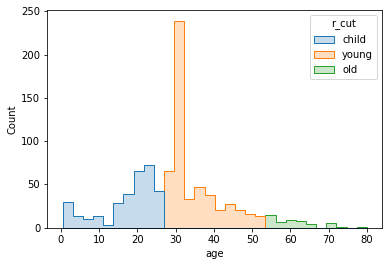

In [44]:
sns.histplot(data=titanic, x='age',hue="r_cut",element="step")


<AxesSubplot:xlabel='age', ylabel='Count'>

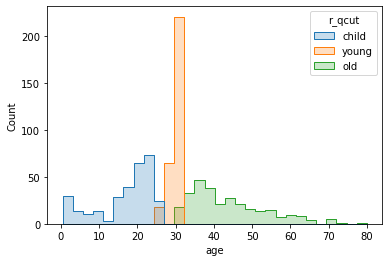

In [45]:
sns.histplot(data=titanic, x='age',hue="r_qcut",element="step")

### sec05 : 판다스를 이용한 데이터 병합,연결
    - 01. concat() 을 이용한 데이터 병합 : 여러 파일,객체로 나누어진 데이터를 연결해서 사용할 때 
                                        서로 다른 데이터프레임들의 구성형태 및 속성이 균일하다면 연결이 가능
    - 02. merge()을 이용한 연결, 병합
    
    - 03. pro02(데이터병합)
    

In [46]:
#concat() : axis = 1 columns행이 추가됨(가로) axis = 0 (index) 열 / 세로

### sec06 각화 _matplotlib / seaborn

- 데이터 수집 -> 데이터 정제 -> 데이터 분석 -> 데이터 시각화
- matplotlib : 파이썬 표준 시각화 라이브러리, 2D평면을 표현 그래프
라인플랫
- seaborn

In [47]:
import pandas as pd
import numpy as np

In [48]:
#1) csv파일을 df로 읽어오자 
df = pd.read_csv('C:\ds_work\data\movies_train.csv')
#2) 첫 끝 5줄 확인
df.head()
df.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [49]:
#3 ) 천만관중을 달성한 영화를 그래프로 나타내 보자 . 관중 수 = box_off_num
천만_df = df[df['box_off_num']>=10000000][['title','box_off_num']]
천만_df

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


<BarContainer object of 6 artists>

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46161 (\N{HANGUL SYLLABLE DUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4630

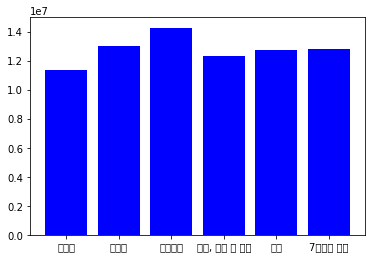

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#fruits = ['apple', 'blueberry', 'cherry', 'orange']
#counts = [40, 100, 30, 55]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(천만_df['title'], 천만_df['box_off_num'], color='blue')

#ax.bar(천만_df['title'], 천만_df['box_off_num'], label=bar_labels, color=bar_colors)
#ax.set_ylabel('fruit supply')
#ax.set_title('Fruit supply by kind and color')
#ax.legend(title='Fruit color')

plt.show()


In [51]:
plt.rcParams["font.family"]

['sans-serif']

In [52]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


<Figure size 864x432 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 1.0, '천만 관중 달성 영화')

Text(0.5, 0, '영화제목')

Text(0, 0.5, '관중수')

matplotlib.figure.Figure

<Figure size 864x432 with 0 Axes>

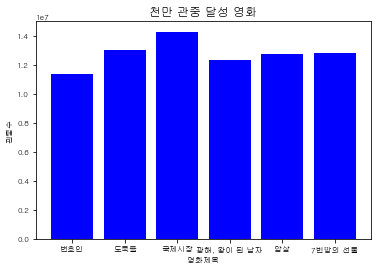

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.rcParams["font.family"]='gulim'
plt.rcParams['font.size']=8
fig, ax = plt.subplots()
plt.bar(천만_df['title'], 천만_df['box_off_num'],  color='blue')
plt.title("천만 관중 달성 영화", fontsize=12)
plt.xlabel("영화제목")
plt.ylabel("관중수")

type(fig)

In [54]:
# import matplotlib.font_manager as fm
# fl = fm.findSystemFonts(fontpath= None, fontext = 'ttf')
# fl[:]
# print(fm.get_font_names())



<Figure size 864x432 with 0 Axes>

KeyError: 'title'

<Figure size 864x432 with 0 Axes>

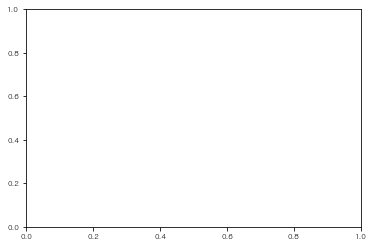

In [55]:
#4 ) 장르별 관객수 평균을 그래프로
장르별관객수 = df.groupby('genre')['box_off_num'].mean()
장르별관객수 = 장르별관객수.reset_index()

plt.figure(figsize=(12,6))
plt.rcParams["font.family"]='gulim'
plt.rcParams['font.size']=8
fig, ax = plt.subplots()
plt.bar(장르별관객수['title'], 장르별관객수['box_off_num'],  color='red')
plt.title("장르별관객수", fontsize=12)
plt.ylabel("관중수")

In [ ]:
# ex) release_time를 시계열데이터로 변환 / 년도별 최대 관객수 변화
# df.info()
df["n_date"]=pd.to_datetime(df['release_time'])
df.head()
df.info()

In [ ]:
# 년도만 추가
df['year']=df["n_date"].dt.year
df.head()
# 년도별 최대 관객수 _그룹핑
year_max = df.groupby('year')['box_off_num'].max()
year_max = year_max.reset_index()
# 그래프
plt.ylim([5000000,15000000])
plt.plot(year_max['year'], year_max['box_off_num'], color='red', marker='o')
plt.show()

In [ ]:
# ex01) 년도별 평균 관객수
# 년도별 최대 관객수 _그룹핑
year_mean = df.groupby('year')['box_off_num'].mean()
year_mean = year_mean.reset_index()
# 그래프
# plt.ylim([5000000,15000000])
plt.plot(year_mean['year'], year_mean['box_off_num'], color='pink', marker='o')
plt.show()

In [ ]:
# ex01) 년도별 평균 관객수
# 년도별 최대 관객수 _그룹핑
year_mean = df.groupby('year')['box_off_num'].mean()
year_mean = year_mean.reset_index()
# 그래프
# plt.ylim([5000000,15000000])
plt.plot(year_mean['year'], year_mean['box_off_num'], color='pink', marker='o')
plt.show()

In [ ]:
# ex02) 그래프만 모아 보기 
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) # 한줄에 2개를 주는데 첫번째 칸
plt.ylim([5000000,15000000])
plt.plot(year_max['year'], year_max['box_off_num'], color='red', marker='o')

plt.subplot(2,2,2)
plt.plot(year_mean['year'], year_mean['box_off_num'], color='pink', marker='o')
plt.show()

In [ ]:
# ex03) 스태프의 분포도 
staff = df['num_staff']
staff.describe()

In [ ]:
plt.hist(staff, color = 'green',alpha=0.3)
plt.title('스탭인원수에 대한 분포도')
plt.show()

In [ ]:
# ex04 ) 영화등급의 비율을 pychart로 만들기
st = df['screening_rat'].value_counts()
st

In [ ]:
plt.pie(st ,labels=st.keys(), autopct="%1.1f%%")
plt.show()

In [ ]:
lis=[56, 34, '가', 90,'다람쥐']
90 in lis


In [ ]:
response = ""
if response : print('1번')
else : print('2번')